In [1]:
import zipfile
local_zip = r'D:\imgs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(r'D:\distracted_driver_detection')
zip_ref.close()

In [2]:
import os
from PIL import Image

dataset_dir = r'D:\distracted_driver_detection\train'
for filenames in os.listdir(dataset_dir):
    dataset = os.path.join(dataset_dir,filenames)
    for filename in os.listdir(dataset):
        file_path = os.path.join(dataset, filename)
        if filename.endswith(".jpg") or filename.endswith(".jpeg"):
            try:
                with Image.open(file_path) as img:
                    pass
            except Exception as e:
                print(f"Error opening {filename}: {e}")


In [3]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [4]:
train_datagen = ImageDataGenerator(rescale=1/255)

In [5]:
train_datagen = ImageDataGenerator(rescale=1/255,)
train_generator = train_datagen.flow_from_directory(
    r'D:\distracted_driver_detection\train',
    target_size=(100, 100), 
    class_mode='categorical', 
    subset='training'
)

Found 22424 images belonging to 10 classes.


<BarContainer object of 10 artists>

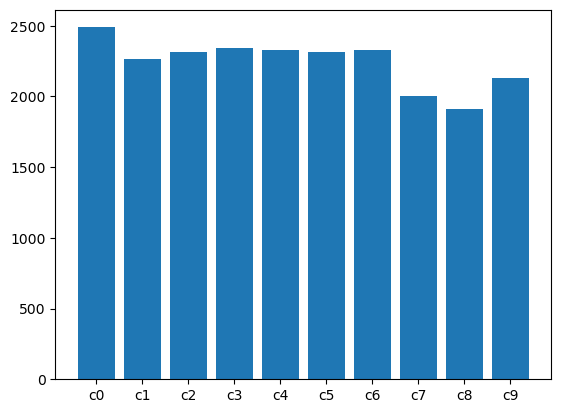

In [6]:
dataset_dir = r'D:\distracted_driver_detection\train'
pic_num = []
x = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']
for filenames in os.listdir(dataset_dir):
    dataset = os.path.join(dataset_dir,filenames)
    files = os.listdir(dataset)
    pic_num.append(len(files))
plt.bar(x,pic_num)

In [7]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense

In [8]:
def create_model_v1():
    # Vanilla CNN model
    model = Sequential()

    model.add(Conv2D(filters = 64, kernel_size = 3, padding='same', activation = 'relu', input_shape=(100,100, 3)))
    model.add(MaxPooling2D(pool_size = 2))

    model.add(Conv2D(filters = 128, padding='same', kernel_size = 3, activation = 'relu'))
    model.add(MaxPooling2D(pool_size = 2))

    model.add(Conv2D(filters = 256, padding='same', kernel_size = 3, activation = 'relu'))
    model.add(MaxPooling2D(pool_size = 2))

    model.add(Conv2D(filters = 512, padding='same', kernel_size = 3, activation = 'relu'))
    model.add(MaxPooling2D(pool_size = 2))

    model.add(Dropout(0.5))

    model.add(Flatten())

    model.add(Dense(500, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = 'softmax'))
    
    return model

In [9]:
model_v1 = create_model_v1()
model_v1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [11]:
model_v1.fit(train_generator,epochs=10,
                 callbacks=[es],
                 verbose=1)

Epoch 1/10


701/701 [==============================] - 7545s 11s/step - loss: 1.0368 - accuracy: 0.6323
Epoch 2/10
701/701 [==============================] - 1875s 3s/step - loss: 0.1667 - accuracy: 0.9518
Epoch 3/10
701/701 [==============================] - 440s 627ms/step - loss: 0.0970 - accuracy: 0.9734
Epoch 4/10
701/701 [==============================] - 407s 580ms/step - loss: 0.0717 - accuracy: 0.9800
Epoch 5/10
701/701 [==============================] - 354s 505ms/step - loss: 0.0594 - accuracy: 0.9850
Epoch 6/10
701/701 [==============================] - 373s 533ms/step - loss: 0.0606 - accuracy: 0.9842
Epoch 7/10
701/701 [==============================] - 384s 547ms/step - loss: 0.0564 - accuracy: 0.9876
Epoch 8/10
701/701 [==============================] - 407s 580ms/step - loss: 0.0511 - accuracy: 0.9885
Epoch 9/10
701/701 [==============================] - 394s 562ms/step - loss: 0.0557 - accuracy: 0.9879
Epoch 10/10
701/701 [==============================] - 375s 534ms

In [14]:
test_datagen = ImageDataGenerator(rescale=1/255,)
test_generator = test_datagen.flow_from_directory(
    r'D:\distracted_driver_detection\test1',
    target_size=(100, 100), 
    class_mode='categorical', 
    subset='training'
)

Found 79726 images belonging to 1 classes.


In [ ]:
predict = model_v1.predict(test_generator)
predictions = predict.argmax(axis=1)  # Convert softmax probabilities to class labels

# Write predictions to CSV file
csv_file = 'predictions.csv'
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Image', 'Predicted Class'])
    for i, prediction in enumerate(predictions):
        writer.writerow([f'image_{i}', prediction])

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('predict.csv')
label = data['Predicted Class']
count = label.value_counts()

<BarContainer object of 10 artists>

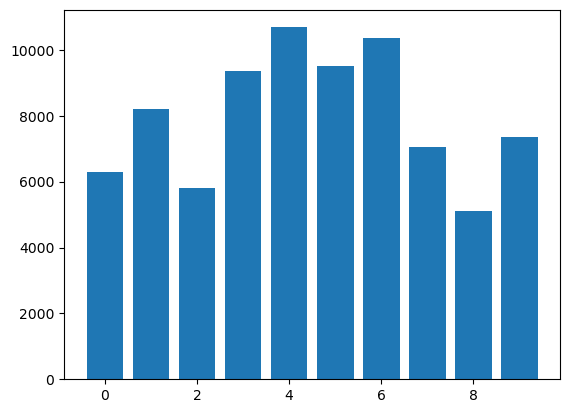

In [5]:
a = np.array(count.values)
b = np.array(count.keys())
plt.bar(b,a)